# Выбор локации для скважины

заказчик «ГлавРосГосНефть».  

Задача: 

Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль

Описание данных:
Данные геологоразведки трёх регионов находятся в файлах, в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов: 

    /datasets/geo_data_0.csv.
    /datasets/geo_data_1.csv.
    /datasets/geo_data_2.csv.
    id — уникальный идентификатор скважины;
    f0, f1, f2 — три признака точек;
    product — объём запасов в скважине (тыс. баррелей).
    
Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Дополнительные данные:

    При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
    Бюджет на разработку скважин в регионе — 10 млрд рублей.
    При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
    После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.



## Загрузка и подготовка данных

In [1]:
from IPython.core.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy.random import RandomState
import seaborn as sns

In [2]:
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
dick_data = dict()
for i in range(3):
    try:
        dick_data[f'region_{i + 1}'] = pd.read_csv(f'/datasets/geo_data_{i}.csv')
    except:
        dick_data[f'region_{i + 1}'] = pd.read_csv(f'https://code.s3.yandex.net/datasets/geo_data_{i}.csv')
else:
    print(f'upload {len(dick_data)} files completed')

upload 3 files completed


<div class="alert alert-success">
<h2> Комментарий ревьюера ✔️ <a class="tocSkip"> </h2>

Здорово, что ты используешь конструкцию `try-except`, это повышает отказоустойчивость кода

</div>


In [4]:
for key in dick_data:
    print(key)
    display(
        f'head {key}',
        dick_data[key].head(),
        f'dtypes {key}',
        dick_data[key].dtypes,
        f'isna {key}',
        dick_data[key].isna().sum(),
        f'duplicated {key}',
        dick_data[key].duplicated().sum(),
        f'describe {key}',
        dick_data[key].describe(),
        f'corr {key}',
        dick_data[key].corr(),
        f'nunique {key}',
        dick_data[key].nunique(),
    )
    print(f'enf of {key}', '*'*50,'\n',sep='\n')

region_1


'head region_1'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


'dtypes region_1'

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

'isna region_1'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'duplicated region_1'

0

'describe region_1'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


'corr region_1'

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


'nunique region_1'

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

enf of region_1
**************************************************


region_2


'head region_2'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


'dtypes region_2'

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

'isna region_2'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'duplicated region_2'

0

'describe region_2'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


'corr region_2'

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


'nunique region_2'

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

enf of region_2
**************************************************


region_3


'head region_3'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


'dtypes region_3'

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object

'isna region_3'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'duplicated region_3'

0

'describe region_3'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


'corr region_3'

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


'nunique region_3'

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

enf of region_3
**************************************************




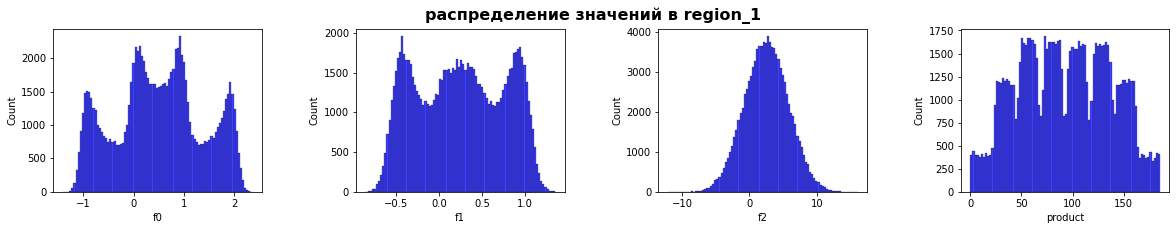

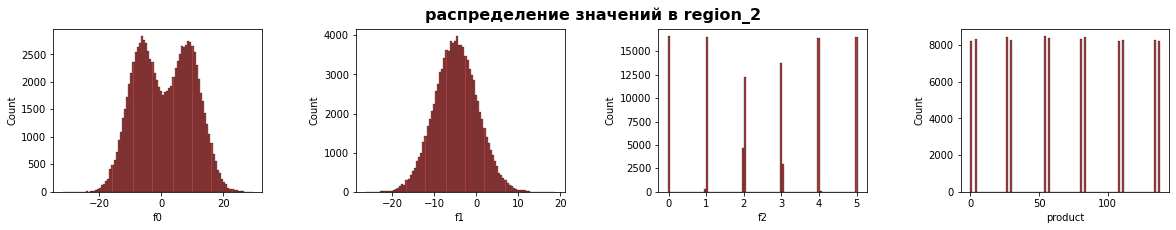

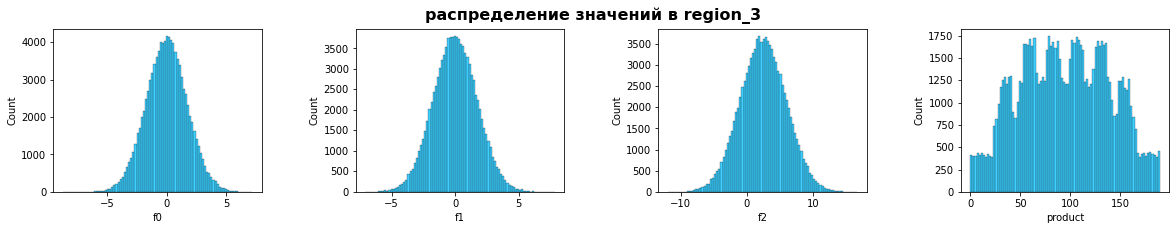

In [5]:
colors=['blue', '#800000', '#00BFFF']
for nums, key in enumerate(dick_data):
    col = list(dick_data[key].select_dtypes(exclude=['object']).columns)
    
    fig, ax = plt.subplots(nrows=1, ncols=len(col), figsize=(20,3))
    fig.suptitle(f'распределение значений в {key}', fontsize=16, fontweight='bold')
    for num, item in enumerate(col):
        sns.histplot(
            ax=ax[num],
            x=dick_data[key][item],
            kde=False,
            bins=int(90),
            color=colors[nums],
        )
    
    plt.subplots_adjust(hspace=.5, wspace=0.45)    
    plt.show()

во втором регионе значения расположены линейно..

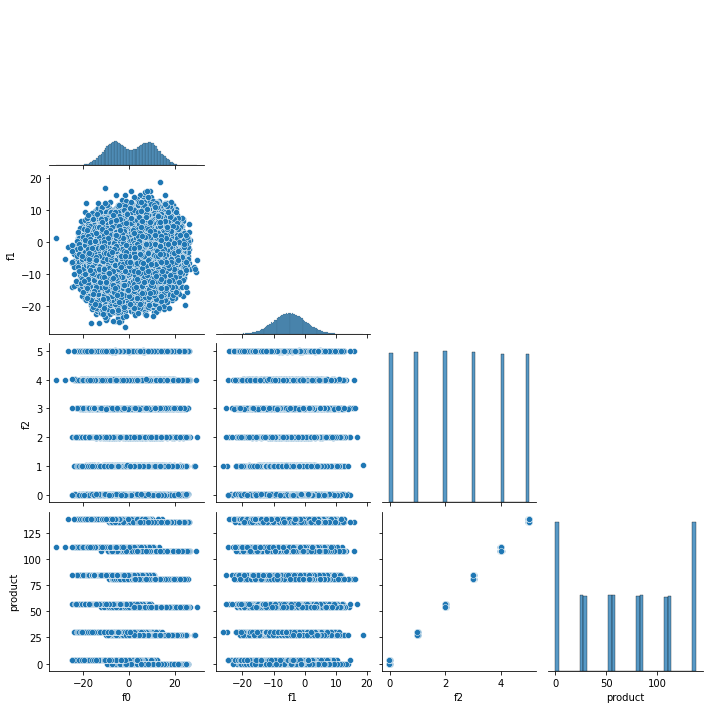

In [6]:
sns.pairplot(
    dick_data['region_2'],
        corner=True
    )
plt.show()

отношение почти всех данных линейное. а корреляция f2 и product очень сильная
    
<s>"мы не знаем что это такое, если бы мы знали что это такое..."</s>

### Краткий вывод

в ходе работы над разделом были загружены данные из 3-х наборов данных. 
во всех наборах:
* типы данных соответствуют содержанию;
* отсутствуют пропуски в данных;
* присутствует корреляция некоторых параметров с целевым значением ;
* присутствует столбец id, который будет мешать обучению
* во втором регионе данные расположены странно

## Обучение и проверка модели

по условиям проекта:

Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

In [7]:
def split_data(data_:pd.DataFrame, random_st)->dict:
    train_data, valid_data, train_target, valid_target = train_test_split(
        data_.drop('product', axis=1), data_['product'], test_size=.25, random_state=random_st)
    return {
        
        'train_data': train_data,
        'valid_data': valid_data,
        'train_target': train_target,
        'valid_target': valid_target
    }

In [8]:
dick_data_learn=dict()
for key in dick_data:
    dick_data_learn[key] = split_data(dick_data[key], 12345)

посмотрим на распределение по выборкам

In [9]:
for key in dick_data_learn:
    print(key, '\n')
    for sample in list(dick_data_learn[key].keys())[0: 2]:
        print(f'доля {sample} = {dick_data_learn[key][sample].shape[0]/dick_data[key].shape[0]:.1%}')
    print(f'enf of {key}', '*'*50, '', sep='\n')

region_1 

доля train_data = 75.0%
доля valid_data = 25.0%
enf of region_1
**************************************************

region_2 

доля train_data = 75.0%
доля valid_data = 25.0%
enf of region_2
**************************************************

region_3 

доля train_data = 75.0%
доля valid_data = 25.0%
enf of region_3
**************************************************



ТК id на выборках может помешать обучению модели удалим это поле из выборок и сохраним их в отдельное поле словаря.
для уменьшения масштаба стандартизируем поля 'f0', 'f1', 'f2'. для этого выберем столбцы и предадим их классу RobustScaler библиотеки sklearn

In [10]:
dick_data_learn['region_1']['train_data'].head(3)

,id,f0,f1,f2
27212,sn8dh,0.022450,0.951034,2.197333
7866,oqj58,1.766731,0.007835,6.436602
62041,MaWjy,0.724514,0.666063,1.840177


In [11]:
column=['f0', 'f1', 'f2']
for key in list(dick_data_learn):
    
    scaller = RobustScaler().fit(dick_data_learn[key]['train_data']
                                 [column])
    
    for sample in list(dick_data_learn[key]):
        try:
            dick_data_learn[key][sample + '_id'] = dick_data_learn[key][sample].id
            
            dick_data_learn[key][sample] = pd.DataFrame(scaller.transform(
                dick_data_learn[key][sample]
                [
                    column
                ]), columns=column)
            
        except:
            dick_data_learn[key][sample].reset_index(inplace=True, drop=True)

на примере первого региона посмотрим, на полученный результат

In [12]:
dick_data_learn['region_1']['train_data'].head(3)

,f0,f1,f2
0,-0.415850,0.779106,-0.072819
1,1.106004,-0.268671,0.884327
2,0.196688,0.462538,-0.153458


обучим модель и сохраним MAE, RMSE в словарь, а в таблицу к валидационным данным добавим предсказание

In [13]:
dick_eval = dict()
for key in list(dick_data_learn):
    model = LinearRegression()
    model.fit(dick_data_learn[key]['train_data'],dick_data_learn[key]['train_target'])
    dick_data_learn[key]['valid_target'] = pd.concat(
        [
            dick_data_learn[key]['valid_target'],
            pd.Series(model.predict(dick_data_learn[key]['valid_data']))
        ], axis=1, ignore_index=True,)
    dick_data_learn[key]['valid_target'].columns = ['product', 'predict']
    dick_eval[key] = dict()
    
    dick_eval[key]['rmse'] = mean_squared_error(
        dick_data_learn[key]['valid_target']['product'],
        dick_data_learn[key]['valid_target']['predict']) ** .5
    
    dick_eval[key]['mae'] = mean_absolute_error(
        dick_data_learn[key]['valid_target']['product'],
        dick_data_learn[key]['valid_target']['predict'])
    dick_eval[key]['true_materials'] = dick_data_learn[key]['valid_target']['product'].mean()
    dick_eval[key]['predict_materials'] = dick_data_learn[key]['valid_target']['predict'].mean()

посмотрим на данные полученные после обучения модели и расчета метрик

In [14]:
pd.DataFrame(dick_eval)

,region_1,region_2,region_3
rmse,37.579422,0.893099,40.029709
mae,30.919601,0.718766,32.792652
true_materials,92.078597,68.723136,94.884233
predict_materials,92.592568,68.728547,94.965046


### Краткий вывод

на данном этапе:
* каждый из 3-х наборов данных был разделен на 2 выборки:
 * тренировочную;
 * проверочную

данные разделены в сотношении 3:1 
* проверено распределение данных по выборкам
* неинформативные данные удалены из наборов
* для уменьшения масштаба стандартизированны поля 'f0', 'f1', 'f2'при помощи класса RobustScaler библиотеки sklearn
* на тренировочных данных была обучена модель и на предсказании расчитаны метрики  MAE, RMSE
* предсказания модели добавлено в таблицы к валидационным данным
* `RMSE` - среднеквадратическое отклонение прогнозируемых значений от фактических. 
* `MAE` - среднее абсолютное отклонение между предсказанными значениями и фактическими  
 * Чем эти метрики ниже, тем лучше модель может «соответствовать» набору данных. Саые низкие показатели MAE И RMSE имеет второй регион  MAE = 0.718766, RMSE = 0.893099

## Подготовка к расчёту прибыли

по условиям проекта:

При разведке региона исследуют 500 точек (all_counts), из которых с помощью машинного обучения нужно выбрать 200 лучших для разработки (counts). 
Бюджет на разработку скважин в регионе — 10 млрд рублей. (budget)
Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей. (price)
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. (loss)

In [15]:
ALL_COUNTS = 500
COUNTS = 200
BUDGET = 10 ** 10
PRICE = 450 * 1000
LOSS = 2.5

In [16]:
min_vol_prod = BUDGET / PRICE
print(f'минимальный обьем для добычи по региону {round(min_vol_prod)} тыс. баррелей')

минимальный обьем для добычи по региону 22222 тыс. баррелей


In [17]:
min_vol_prod_hole = min_vol_prod / COUNTS
print(f'минимальный обьем для добычи c скважины по региону {round(min_vol_prod_hole)} тыс. баррелей')

минимальный обьем для добычи c скважины по региону 111 тыс. баррелей


посмотрим сколько нехватает по каждому из регионов

In [18]:
print('разница между предсказанным средним \
и минимальным расчетным объемом добычи по региону:')
for key in list(dick_eval):
    print(f'{key}:')
    print(dick_eval[key]["predict_materials"] - min_vol_prod_hole, '\n')

разница между предсказанным средним и минимальным расчетным объемом добычи по региону:
region_1:
-18.518543326730764 

region_2:
-42.38256421566511 

region_3:
-16.146065143106227 



минимальный обьем для добычи по региону =~ 111, а у нас средний предсказанный обьем по регионам равен 92.674531, 68.794570, 94.884307

все средние в минусе

посмотрим на предсказание модели

### Краткий вывод

при работе над разделом было рассчитано:
* минимальный обьем добычи ископаемых, по региону, примерно равный 22222 тыс. баррелей
* минимальный обьем добычи ископаемых, на сквжаину, примерно равный 111 тыс. баррелей
* разница между предсказанным средним и минимальным расчетным объемом добычи по региону (для всех регионов занчения находятся в отрицательной плоскости)

## Расчёт прибыли и рисков 

функция для расчета прибыли

In [26]:
def sum_profit(data:pd.DataFrame, sort_col:str='predict',
               get_col:str='product', price_f:int=450 * 1000,
               budget_f:int=10 ** 10, count:int=200):
 
    data = data.sort_values(by=[sort_col], ascending=False)[get_col][: count]
    result = (data.sum() * PRICE - budget_f) / 10 ** 9
    return result

предадим 200 лучших скважин с максимальными значениями предсказаний функции

In [27]:
for key in list(dick_data_learn):
    predict_profit = sum_profit(dick_data_learn[key]['valid_target'])
    dick_eval[key]['predict_profit'] = predict_profit
    
    print(f' доход {COUNTS} лучших скважин {key} по предсказаниям {predict_profit} млрд. р.')
    print('\n', '*' * 10, '\n')

 доход 200 лучших скважин region_1 по предсказаниям 3.3208260431398506 млрд. р.

 ********** 

 доход 200 лучших скважин region_2 по предсказаниям 2.4150866966815108 млрд. р.

 ********** 

 доход 200 лучших скважин region_3 по предсказаниям 2.7103499635998327 млрд. р.

 ********** 



первый регион в лидерах по максимальной прибыли, при добычи из лучших скважин региона 

In [21]:
pd.DataFrame(dick_eval)

,region_1,region_2,region_3
rmse,37.579422,0.893099,40.029709
mae,30.919601,0.718766,32.792652
true_materials,92.078597,68.723136,94.884233
predict_materials,92.592568,68.728547,94.965046
predict_profit,3.320826,2.415087,2.710350


Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

создадим функцию

In [22]:
def min_max_lines(
    c_max:float,
    s_max:float,
    mean:float,
    data,
    reg:str
):
    g = sns.histplot(data=data, color='blue')
    # vertical lines
    g.vlines(x=[c_max, mean, s_max],  ymin=0, ymax=125, colors=['orange', '#00BFFF', 'orange'], ls='--', lw=2)
    plt.title(reg)
    plt.show()

In [23]:
def func_b_strap(data:pd.DataFrame, n=ALL_COUNTS, samples=1000, state=None, reg=None):
    if not state:
        state = RandomState(12345)
    values = []
    
    for i in range(samples):
        target_subsample = data['valid_target'].sample(n=n, replace=True, random_state=state)
        values.append(sum_profit(target_subsample, count=COUNTS))
    
    values = pd.Series(values)
    
    lower = values.quantile(LOSS / 100)
    upper = values.quantile((100 - LOSS) / 100)
    
    values_mean = values.mean()
    risk = (values < 0).mean()
    min_max_lines(lower, upper, values_mean, values, reg)
    return lower, upper, values_mean, risk

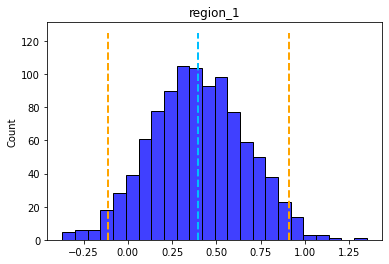

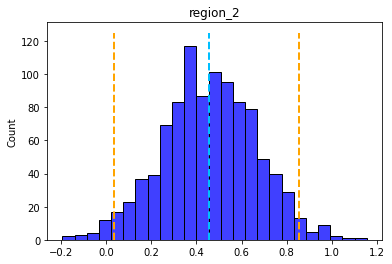

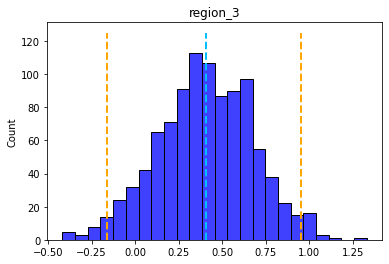

In [24]:
result = dict()
for key in list(dick_data_learn):
    report = func_b_strap(dick_data_learn[key], state=RandomState(12345), reg=key)
    result[key] = {'interval_95%': f'{report[0]:.4f} : {report[1]:.4f}',
                              'mean_values': report[2],
                              'risk': f'{report[3]:.2%}'}

посмотрим, что получили

In [25]:
pd.DataFrame(result)

,region_1,region_2,region_3
interval_95%,-0.1112 : 0.9098,0.0338 : 0.8523,-0.1634 : 0.9504
mean_values,0.396165,0.456045,0.404404
risk,6.90%,1.50%,7.60%


первый и третий регионы имеют очень высокую степень риска > 2.5%

второй регион соответствует условиям заказчика

### краткий вывод

Входе работы над разделом:
* создана функция для расчета прибыли;
* расчитна максимальная прибыль при разработке региона (3.32, 2.415, 2.71 (в млрд. р.))
* методом bootstrap расчитана средняя ожидаемая прибыль, доверительный инервал в 95% и риски, для каждого региона
* первый и третий регионы имеют очень высокую степень риска > 2.5%

* второй регион соответствует условиям 
<div class="alert alert-info" style="border:solid blue 2px; padding: 0px">
    однако непонятно что там творится в данных. нужно уточнить данные у заказчика


## Общий вывод

В ходе реализации проекта были проведены следующие этапы работы:
* Загрузка и подготовка данных
 * загружены и рассмотрены предоставленные наборы данных
 * обнаружен столбец (id), который не имеет ценности, а данные хранящиеся в нем будут мешать обучению модели
 * обнаружены и рассмотрены корреляция признаков набора данных с целевым
 
 
* на этапе обучения и проверки модели выполнено:
 * каждый из 3-х наборов данных был разделен на 2 выборки тренировочную и проверочную. данные разделены в сотношении 3:1 
 * проверено распределение данных по выборкам
 * неинформативные и мещающие данные удалены из наборов
 * для уменьшения масштаба стандартизированны поля 'f0', 'f1', 'f2' при помощи класса RobustScaler библиотеки sklearn
 * на тренировочных данных была обучена модель
 * на основе обучения и проверочной выборки получены предсказания модели и расчитаны метрики MAE, RMSE
 * RMSE - среднеквадратическое отклонение прогнозируемых значений от фактических.
 * MAE - среднее абсолютное отклонение между предсказанными значениями и фактическими

   * Чем эти метрики ниже, тем лучше модель может «соответствовать» набору данных. Саые низкие показатели MAE И RMSE имеет второй регион MAE = 0.720873, RMSE = 0.895944
 * предсказания модели добавлено в таблицы к валидационным данным


* при работе над разделом было рассчитано:
 * минимальный обьем добычи ископаемых, по региону, примерно равный 22222 тыс. баррелей
 * минимальный обьем добычи ископаемых, на сквжаину, примерно равный 111 тыс. баррелей
 * разница между предсказанным средним и минимальным расчетным объемом добычи по региону (для всех регионов занчения находятся в отрицательной плоскости)


* при расчёте прибыли и рисков выполнен:
 * расчет максимальной прибыли по регионам на 200 лучших скважин. расчет произведен по разведанным и с учетом предсказания модели
  /*  максимальноая прибыль по:
   * первому региону  =  3.32082604313 млрд. р.
   * второму региону  =  2.41508669668 млрд. р.
   * третьему региону =  2.71034996359 млрд. р.
 * методом bootstrap расчитана средняя ожидаемая прибыль, доверительный инервал в 95% и риски, для каждого региона
  /* по результатам расчета рисков первый и третий регионы имеют очень высокую степень риска > 2.5%, что не устраивает заказчика и несет большую вероятность убытков
 /* второй регион соответствует условиям заказчика со степенью риска 1,5%
 /* предпологаемым доходом от 0.0338 до 0.8523 млрд. р., средним доходом в 0.456045 млрд. р., максимально возможным доходом 2.415 млрд. р.
 
 обратить внимание заказчика на то, что если в данных была ошибка расчеты нужн повторить, тк использование испорченных данных может привести к убыткам